In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CAP_Tableau_Scraped.csv")

In [3]:
print("There are {} observations for {} predictors.".format(df.shape[0],df.shape[1]))
df.head()

There are 300257 observations for 32 predictors.


,Airline,From,To,Price,Class Category,Class,Day,Month,Flight,Route,...,Dep Daytime Category,Month Category,Days_Left,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,Air India,Delhi,Hyderabad,11310,Economy,0,18,2,AI-502,Delhi-Hyderabad,...,Daytime Departure,February,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Air India,Delhi,Hyderabad,14355,Economy,0,19,2,AI-807,Delhi-Hyderabad,...,Daytime Departure,February,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Air India,Delhi,Hyderabad,11310,Economy,0,21,2,AI-506,Delhi-Hyderabad,...,Daytime Departure,February,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Air India,Delhi,Hyderabad,6359,Economy,0,25,2,AI-459,Delhi-Hyderabad,...,Daytime Departure,February,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Air India,Delhi,Hyderabad,6779,Economy,0,26,2,AI-807,Delhi-Hyderabad,...,Daytime Departure,February,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Airline', 'From', 'To', 'Price', 'Class Category', 'Class', 'Day',
       'Month', 'Flight', 'Route', 'Dep Hour', 'Arr Hour', 'Dep Period',
       'Arr Period', 'Airline Index', 'Route Index', 'Duration In Min',
       'Stops', 'Stops Category', 'Arr Daytime', 'Arr Daytime Category',
       'Dep Daytime', 'Dep Daytime Category', 'Month Category', 'Days_Left',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31'],
      dtype='object')

In [5]:
cols=['Class Category','Day','Month','Route','Dep Hour','Arr Hour','Airline Index','Route Index','Arr Daytime','Arr Daytime Category','Dep Daytime','Dep Daytime Category','Month Category', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31']
df=df.drop(cols, axis=1)

In [6]:
print("There are {} observations for {} predictors.".format(df.shape[0],df.shape[1]))
df.head()

There are 300257 observations for 12 predictors.


,Airline,From,To,Price,Class,Flight,Dep Period,Arr Period,Duration In Min,Stops,Stops Category,Days_Left
0,Air India,Delhi,Hyderabad,11310,0,AI-502,Afternoon,Morning,870,1,1-Stop,8
1,Air India,Delhi,Hyderabad,14355,0,AI-807,Afternoon,Morning,870,1,1-Stop,9
2,Air India,Delhi,Hyderabad,11310,0,AI-506,Afternoon,Morning,870,1,1-Stop,11
3,Air India,Delhi,Hyderabad,6359,0,AI-459,Afternoon,Morning,870,1,1-Stop,15
4,Air India,Delhi,Hyderabad,6779,0,AI-807,Afternoon,Morning,870,1,1-Stop,16


In [7]:
df.tail()

,Airline,From,To,Price,Class,Flight,Dep Period,Arr Period,Duration In Min,Stops,Stops Category,Days_Left
300252,Air India,Kolkata,Hyderabad,15624,0,UK-776,Afternoon,Morning,1225,2,Multiple-Stops,4
300253,Air India,Kolkata,Hyderabad,12894,0,6E-7264,Afternoon,Morning,1225,2,Multiple-Stops,11
300254,Air India,Kolkata,Hyderabad,16530,0,UK-738,Afternoon,Morning,1120,2,Multiple-Stops,2
300255,Air India,Kolkata,Hyderabad,15165,0,AI-424,Afternoon,Morning,1120,2,Multiple-Stops,6
300256,Air India,Kolkata,Hyderabad,8973,0,UK-720,Afternoon,Morning,1120,2,Multiple-Stops,17


In [8]:
df.shape

(300257, 12)

In [9]:
df.isnull().sum()

Airline            0
From               0
To                 0
Price              0
Class              0
Flight             0
Dep Period         0
Arr Period         0
Duration In Min    0
Stops              0
Stops Category     0
Days_Left          0
dtype: int64

In [10]:
df.describe()

,Price,Class,Duration In Min,Stops,Days_Left
count,300257.000000,300257.000000,300257.000000,300257.000000,300257.000000
mean,20883.926526,0.311357,733.074383,0.924205,26.036459
std,22695.990185,0.463049,431.572124,0.398181,13.537925
min,1105.000000,0.000000,50.000000,0.000000,1.000000
25%,4783.000000,0.000000,405.000000,1.000000,15.000000
50%,7425.000000,0.000000,675.000000,1.000000,26.000000
75%,42521.000000,1.000000,970.000000,1.000000,38.000000
max,123071.000000,1.000000,2990.000000,2.000000,49.000000


In [11]:
df.describe(include='all')

,Airline,From,To,Price,Class,Flight,Dep Period,Arr Period,Duration In Min,Stops,Stops Category,Days_Left
count,300257,300257,300257,300257.000000,300257.000000,300257,300257,300257,300257.000000,300257.000000,300257,300257.000000
unique,8,6,6,NaN,NaN,1560,4,4,NaN,NaN,3,NaN
top,Vistara,Delhi,Mumbai,NaN,NaN,UK-706,Morning,Night,NaN,NaN,1-Stop,NaN
freq,127859,61345,59108,NaN,NaN,1932,113028,124685,NaN,NaN,250927,NaN
mean,NaN,NaN,NaN,20883.926526,0.311357,NaN,NaN,NaN,733.074383,0.924205,NaN,26.036459
std,NaN,NaN,NaN,22695.990185,0.463049,NaN,NaN,NaN,431.572124,0.398181,NaN,13.537925
min,NaN,NaN,NaN,1105.000000,0.000000,NaN,NaN,NaN,50.000000,0.000000,NaN,1.000000
25%,NaN,NaN,NaN,4783.000000,0.000000,NaN,NaN,NaN,405.000000,1.000000,NaN,15.000000
50%,NaN,NaN,NaN,7425.000000,0.000000,NaN,NaN,NaN,675.000000,1.000000,NaN,26.000000
75%,NaN,NaN,NaN,42521.000000,1.000000,NaN,NaN,NaN,970.000000,1.000000,NaN,38.000000


In [12]:
df.nunique()

Airline                8
From                   6
To                     6
Price              12165
Class                  2
Flight              1560
Dep Period             4
Arr Period             4
Duration In Min      476
Stops                  3
Stops Category         3
Days_Left             49
dtype: int64

<AxesSubplot:xlabel='Price'>

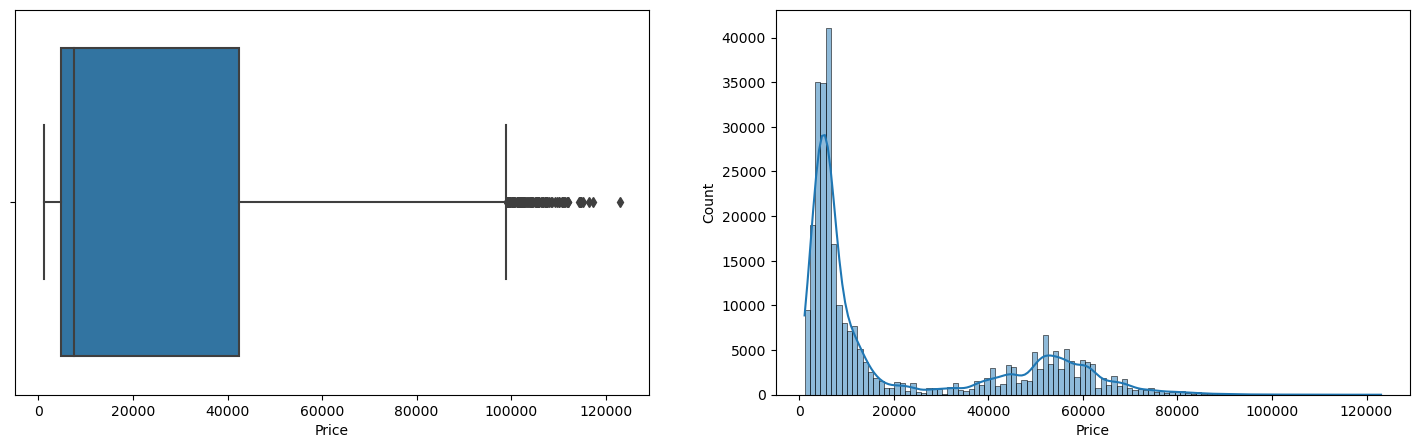

In [13]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'Price', data = df, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'Price', data = df)

Even though the mean is around 20000, we can see here that the median is approximately 7500. This difference is explainable by the presence of two different tickets: business and economy. On the second graph, we can see that the dispersion seems to be composed by two gaussian curves.

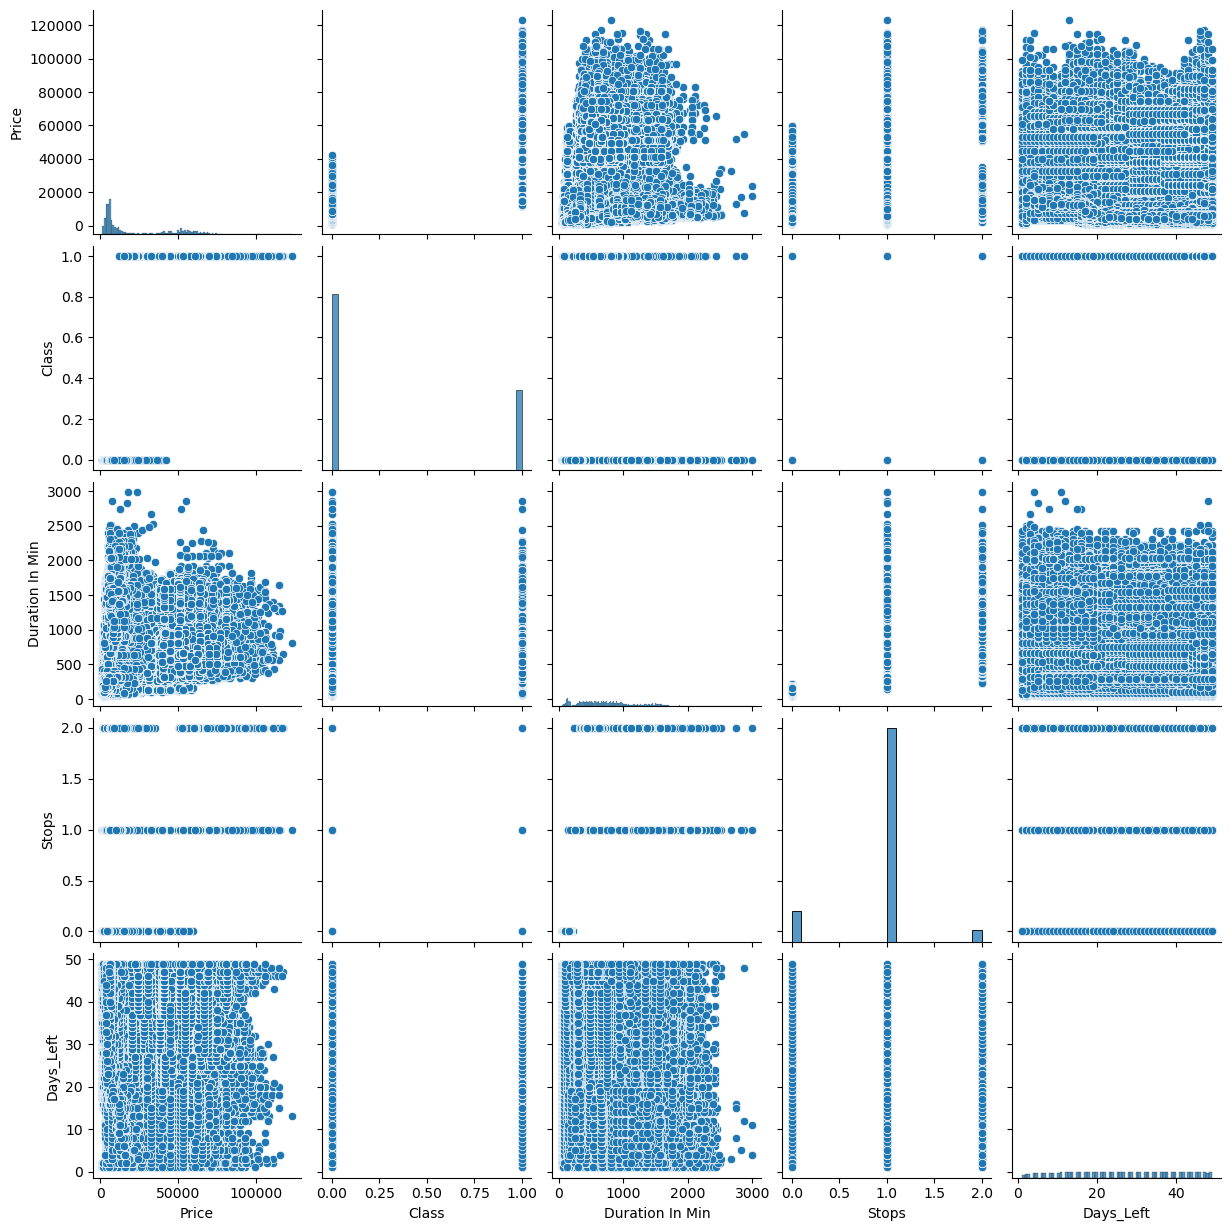

In [14]:
sns.pairplot(df)

#### 1. What is the difference in ticket prices between Economy and Business classes?

To visualize the difference between the two kind of tickets, I will plot the prices for the two prices for both business and economy tickets for the different companies.

In [15]:
df['Class'] = df['Class'].replace({0: 'economy', 1: 'business'})

Text(0.5, 1.0, 'Airline prices based on the class and company')

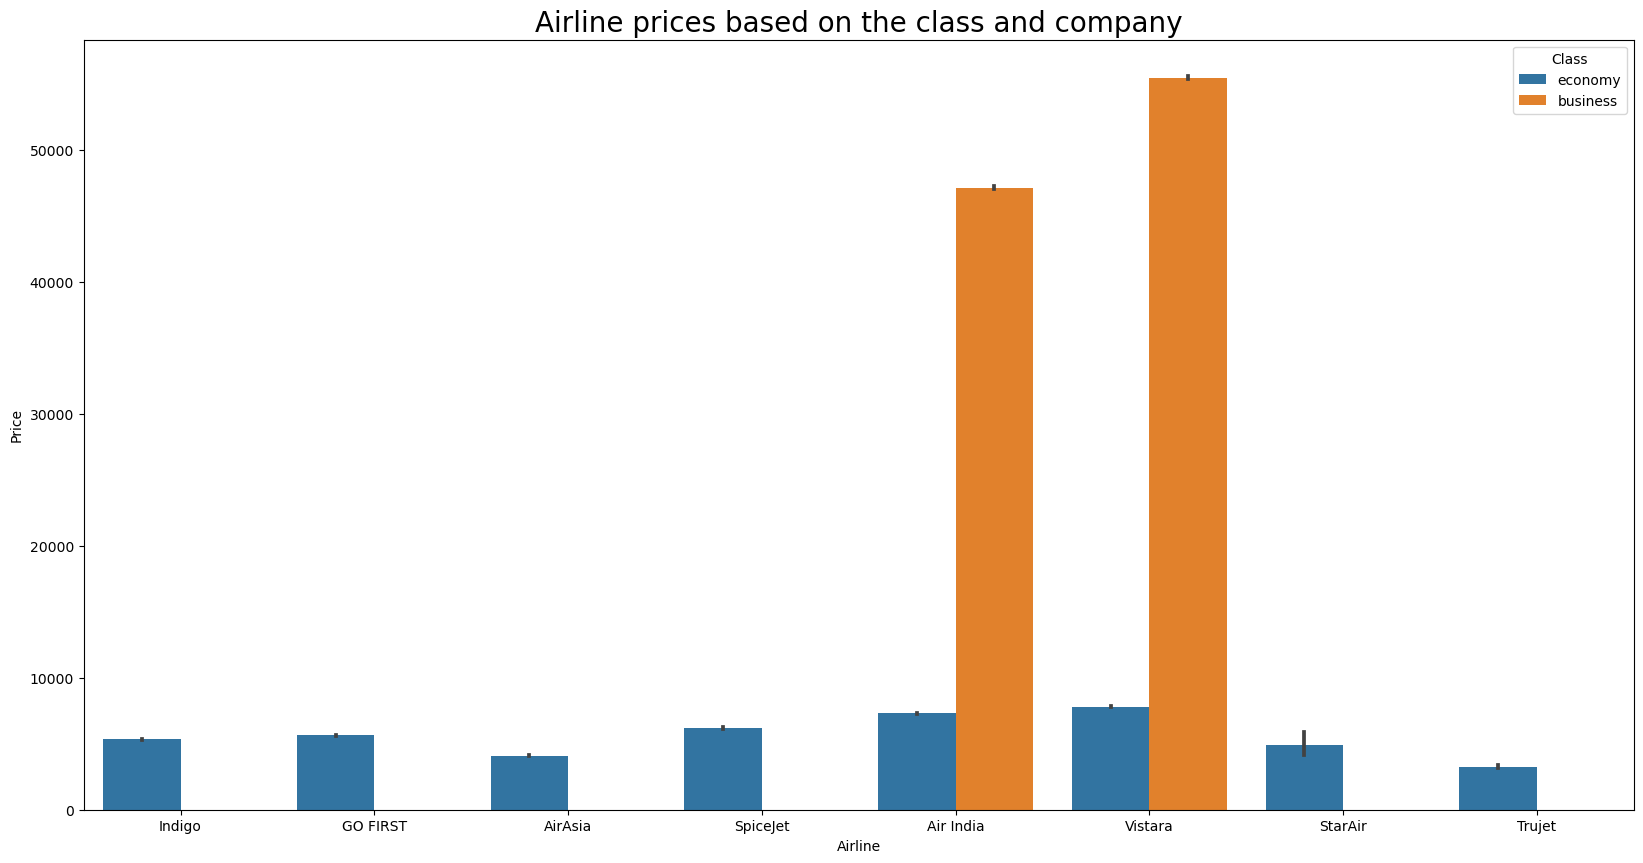

In [16]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Airline',y='Price',hue="Class",data=df.sort_values("Price")).set_title('Airline prices based on the class and company',fontsize=20)

Business flights are only available in two companies: Air India and Vistara. Also, there is a big gap between the prices in the two class that reaches almost 5 times the price of Economy for Business tickets.

#### 2. Does Price vary with Airlines?

To compare the prices between the companies we will only compare the same kind of tickets since the previous question showed that the class has a big impact on the final price.

Text(0.5, 1.0, 'Airline prices based on companies for business tickets')

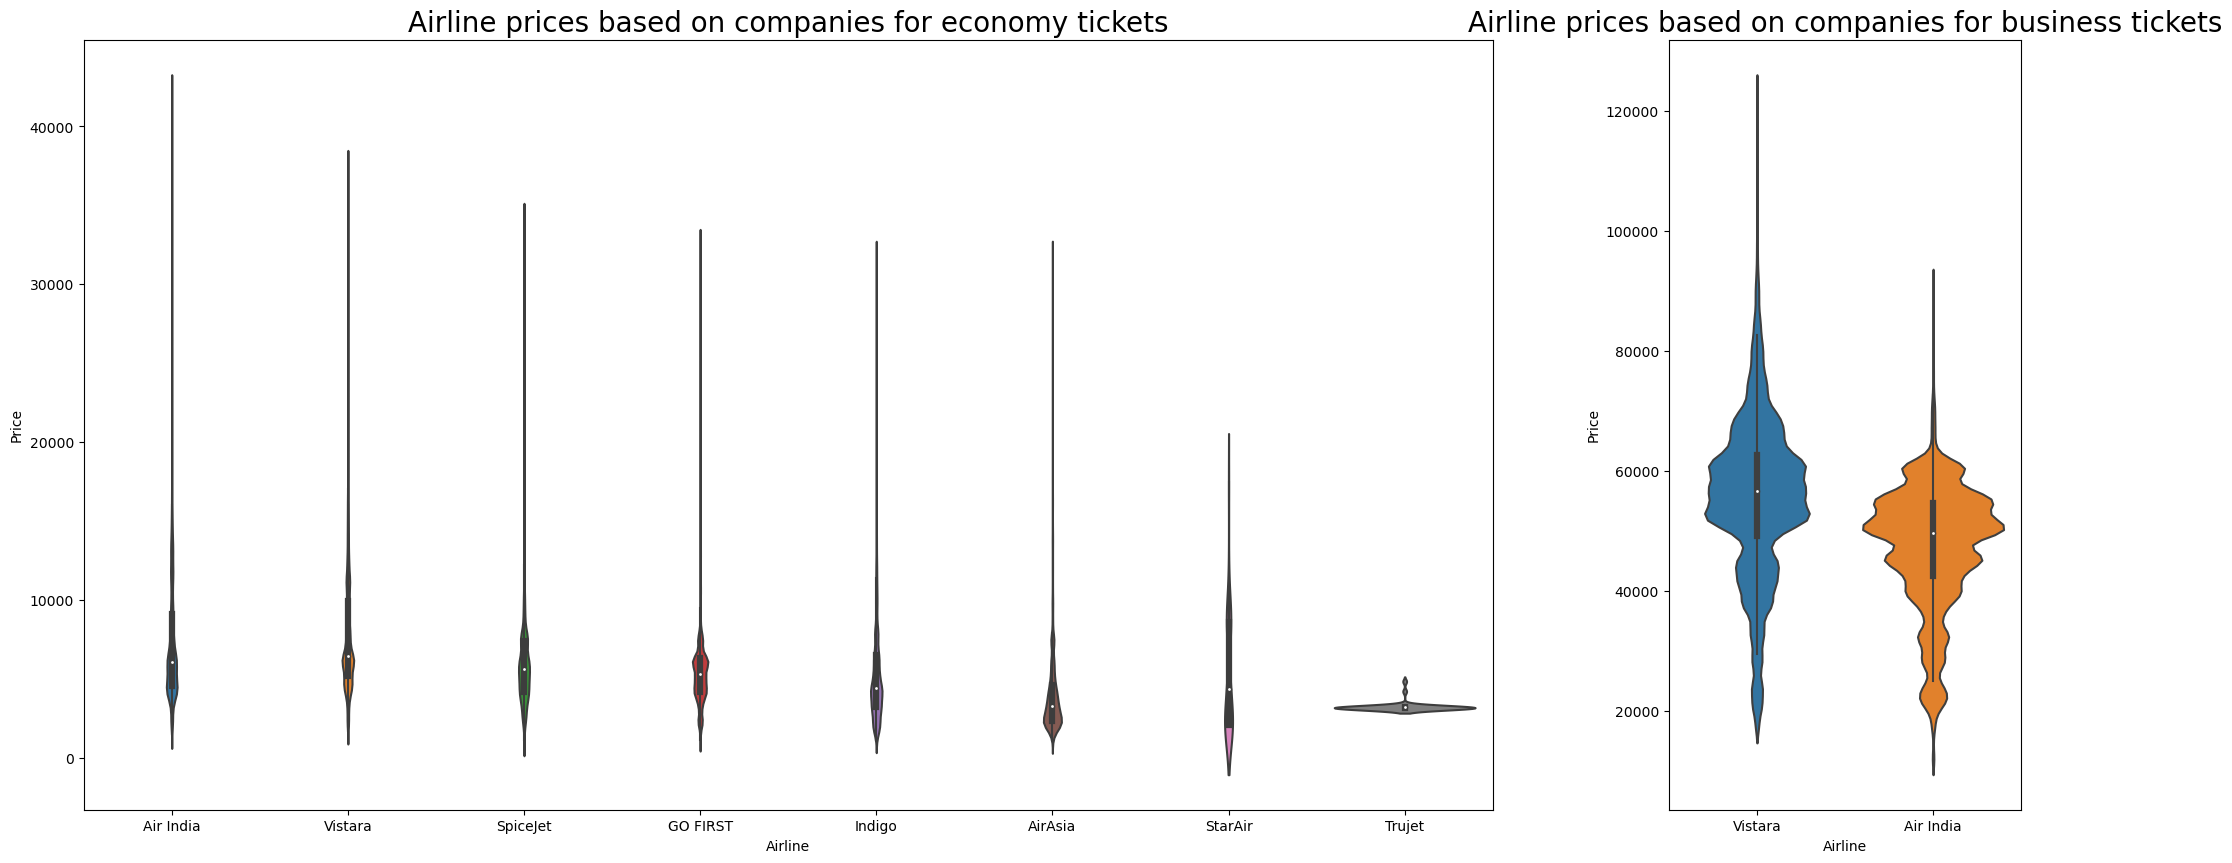

In [17]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [20, 5]}, figsize=(25, 10))
sns.violinplot(y = "Price", x = "Airline",data = df.loc[df["Class"]=='economy'].sort_values("Price", ascending = False), kind="boxen", ax=axs[0])
axs[0].set_title("Airline prices based on companies for economy tickets",fontsize=20)
sns.violinplot(y = "Price", x = "Airline",data = df.loc[df["Class"]=='business'].sort_values("Price", ascending = False), kind="boxen", ax=axs[1])
axs[1].set_title("Airline prices based on companies for business tickets",fontsize=20)

There are slight differences between each companies on this graph, AirAsia seems to have the cheapest flights when Air India and Vistara are more expensive. However it looks like Vistara's business tickets are a little more expensive than the Air India's ones.

#### 3. Is the price of a ticket affected by the departure and arrival times?

Text(0.5, 1.0, 'Airline prices based on the arrival time')

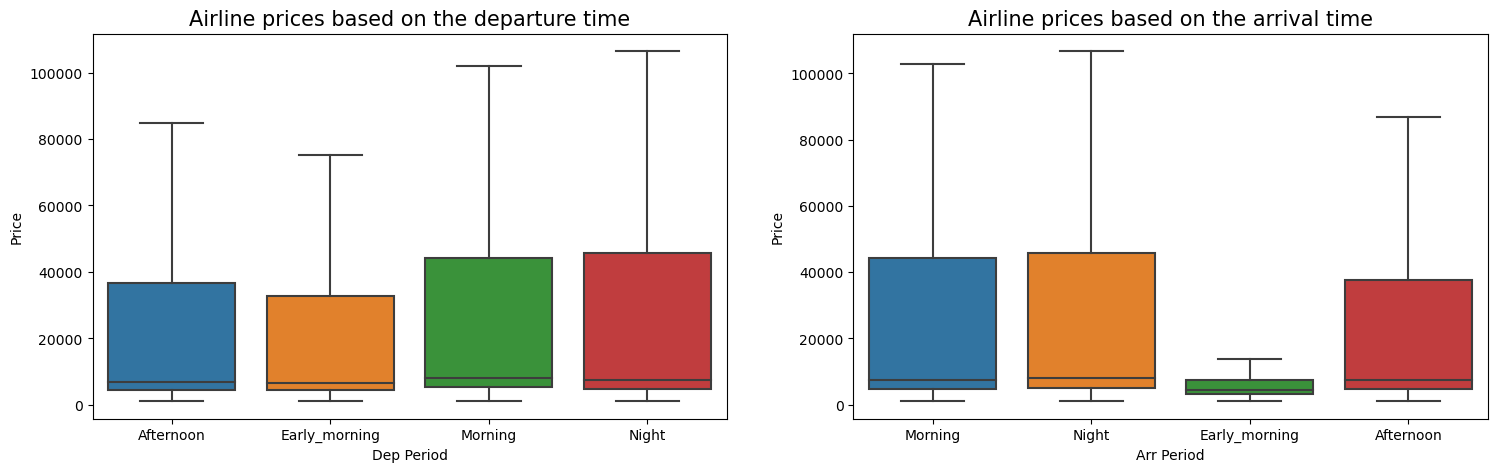

In [18]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="Price", x="Dep Period",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=df, y="Price", x="Arr Period",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)

As expected, leaving early in the morning remains the cheapest way to travel. But it's also visible that arriving early morning is also cheap and afternoon flight are a bit cheaper than morning and night flights.

#### 4. How does the price change as the source and destination change?

To answer this question, I will visualize the different prices for all the destinations as a departure and arrival destination.

In [19]:
sns.set_style("whitegrid")

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

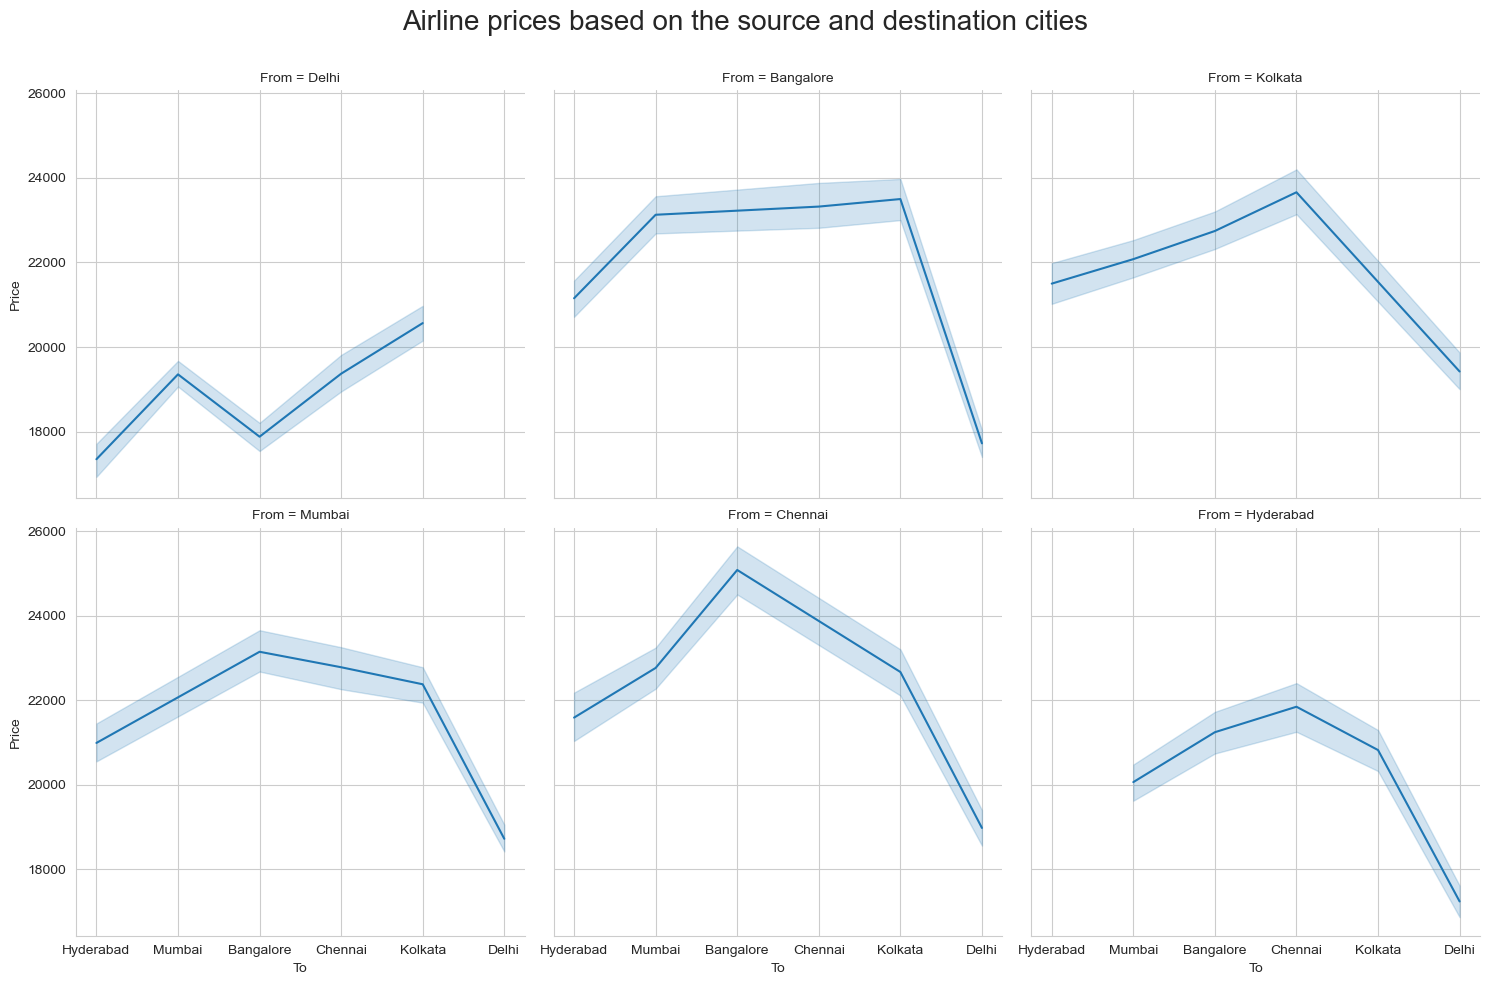

In [20]:
ax = sns.relplot(col="From", y="Price", kind="line",x='To', data=df, col_wrap=3)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ax.fig.suptitle('Airline prices based on the source and destination cities',fontsize=20)

On one hand, it seems that flights leaving from Delhi are often cheaper that from other source cities and Delhi is also the cheapest destination to go probably because it is the capital of India, the airport is the biggest and proposes more flights. On the other hand, the prices are more or less similar to and from all the cities.

#### 5. Does the number of stops have an effect on the price?

Let's see how the number of stop may influence the final price.

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

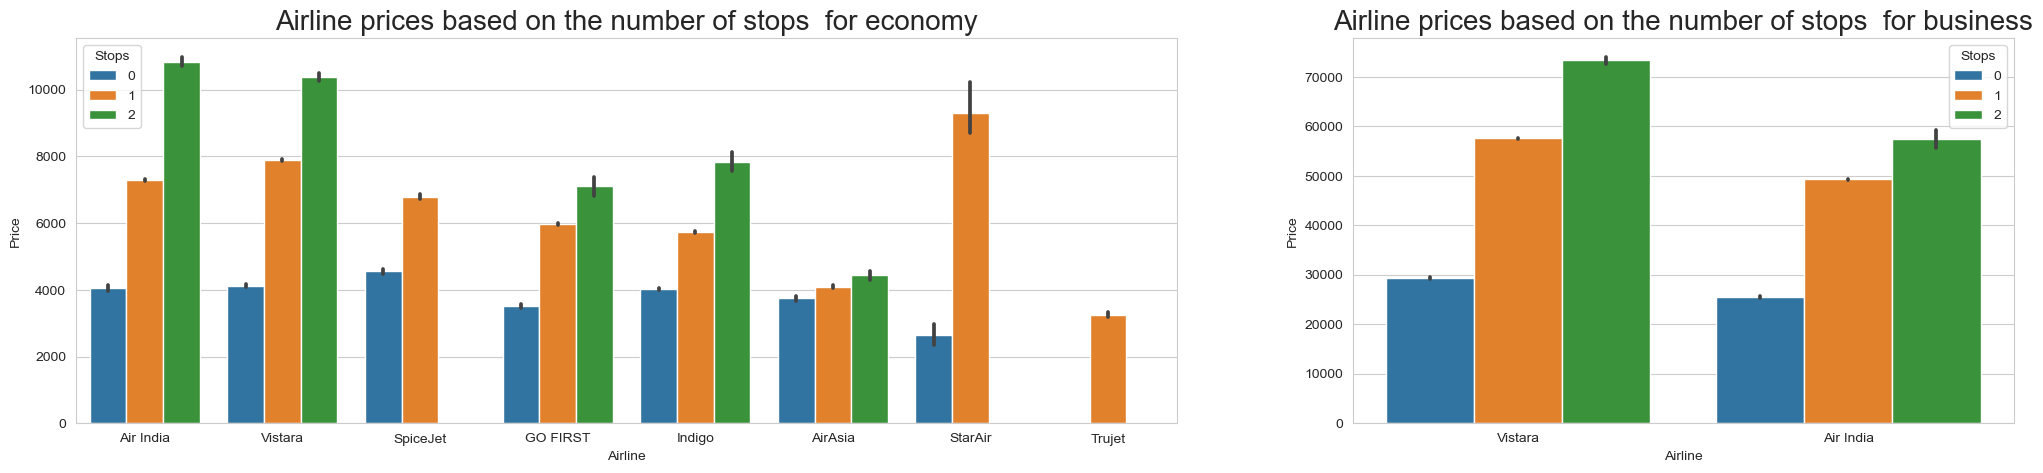

In [21]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "Price", x = "Airline",hue="Stops",data = df.loc[df["Class"]=='economy'].sort_values("Price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "Price", x = "Airline",hue="Stops",data = df.loc[df["Class"]=='business'].sort_values("Price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

It's clear that the more stops there are, the more expensive the flight is, except for AirAsia where the prices seem more constant. The behaviour and different analysis of AirAsia tend to show that it relates to a low cost company.

#### 6. Does the price change with the duration of the flight?

Let's see how the duration of the flight may affect the final price.

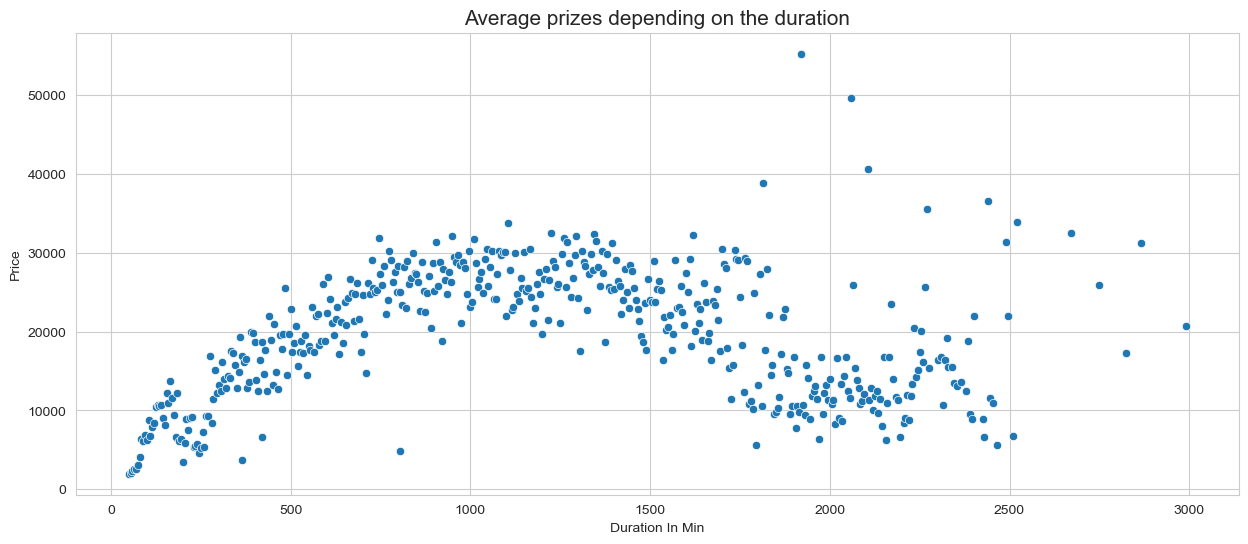

In [22]:
df_temp = df.groupby(['Duration In Min'])['Price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="Duration In Min", y="Price", data=df_temp).set_title("Average prizes depending on the duration",fontsize=15)

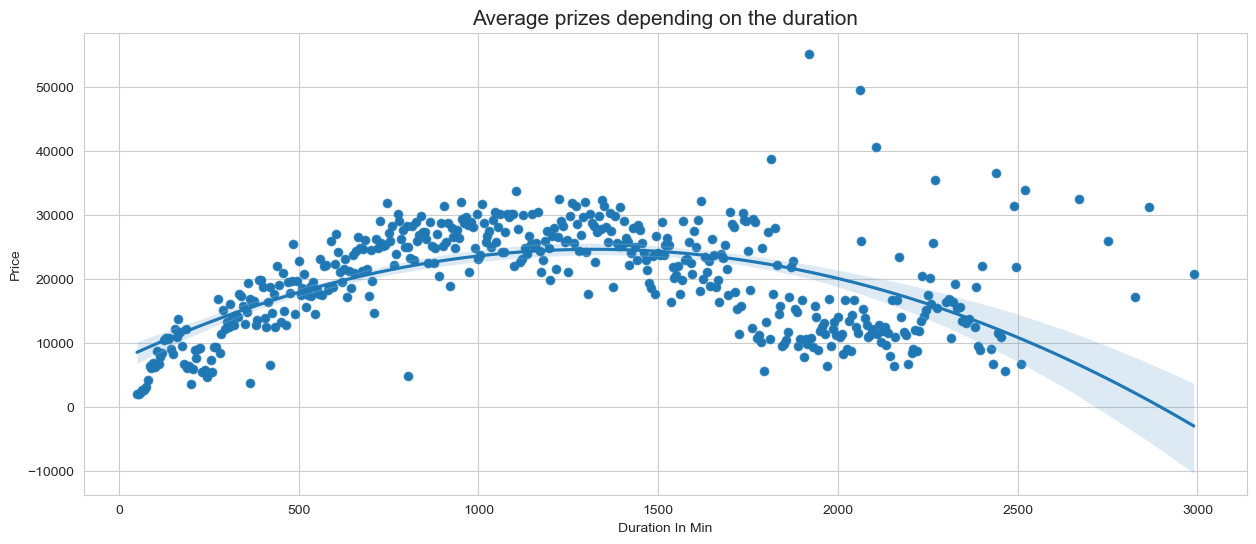

In [23]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="Duration In Min", y="Price", data=df_temp).set_title("Average prizes depending on the duration",fontsize=15)
ax = sns.regplot(x="Duration In Min", y="Price", data=df_temp, order=2)

It is clear that here the relationship is not linear but can be approximated with a second degree curve. The prices reaches a high price at a duration of 20 hours before lowering again.

However some outliers seem to affect the regression curve .

#### 7. How is the price affected when tickets are bought in just 1 or 2 days before departure?

To visualize how the prices changes depending on the number of days left, I will calculate the average price depending on the days left, to try to understand a pattern in the curve.

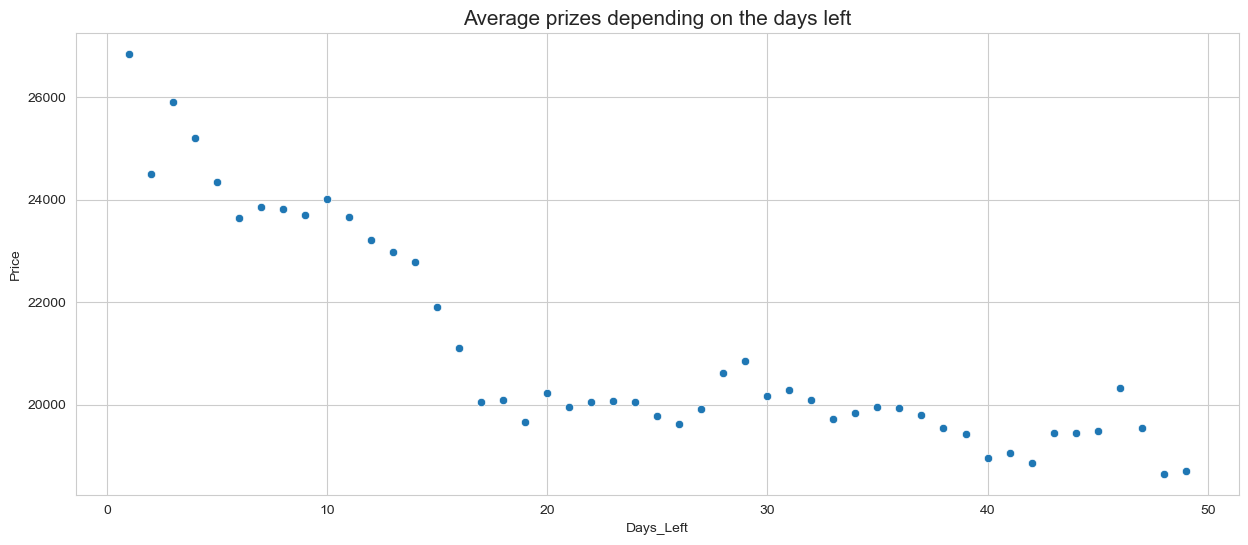

In [24]:
df_temp = df.groupby(['Days_Left'])['Price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="Days_Left", y="Price", data=df_temp).set_title("Average prizes depending on the days left",fontsize=15)

It is possible to see two different curves on this graph, the first one, stable between 50 and 20 days before the flight, and a positive monotone curve between 20 and 2 days before.

<AxesSubplot:xlabel='Days_Left', ylabel='Price'>

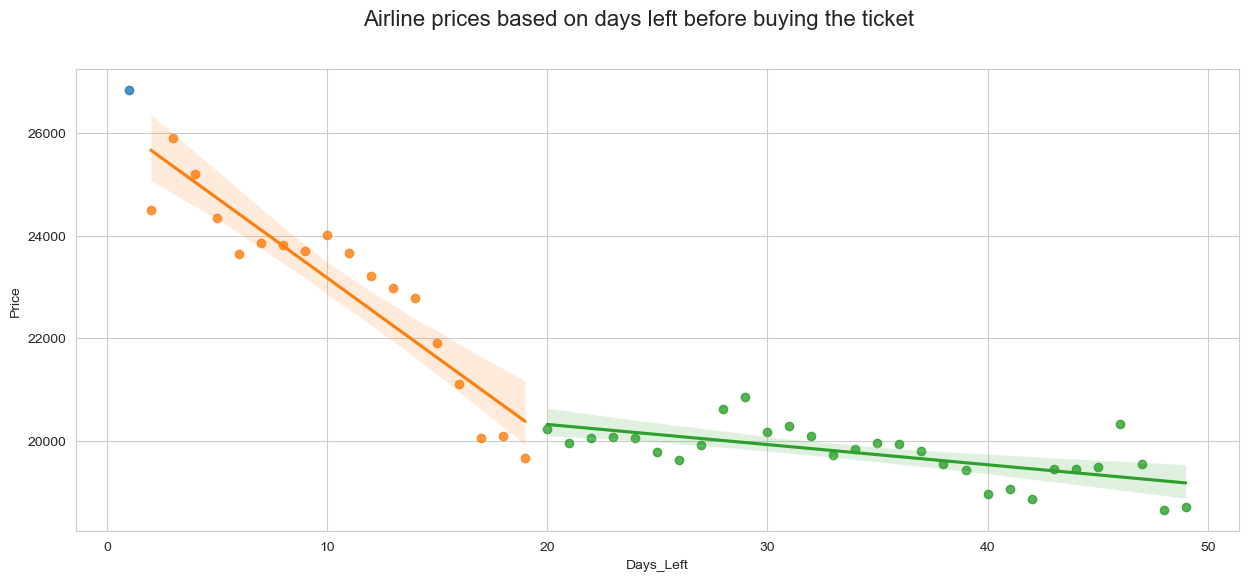

In [25]:
plt.figure(figsize=(15,6)).suptitle('Airline prices based on days left before buying the ticket', fontsize=16)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["Days_Left"]==1].Days_Left, y=df_temp.loc[df_temp["Days_Left"]==1].Price, fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["Days_Left"]>1)&(df_temp["Days_Left"]<20)].Days_Left, y=df_temp.loc[(df_temp["Days_Left"]>1)&(df_temp["Days_Left"]<20)].Price, fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["Days_Left"]>=20].Days_Left, y=df_temp.loc[df_temp["Days_Left"]>=20].Price, fit_reg=True, ax=ax)

A pattern is clearly visible in the way prices evolve depending on the days left. <BR>
The graph highlights how the prices rise slowly and then drastically start rising 20 days before the flight, but fall just one day before the flight up to three times cheaper. This can be explain by the fact the companies want to fill their empty seats and thus lower the prices of the tickets to ensure the planes remains full.

#### 8. What factors have the most influence on price?

In [26]:
def preprocessing(df):    #Encode the ordinal variables "stops" and "class".
    df["Stops Category"] = df["Stops Category"].replace({'Non-stop':0,'1-Stop':1,'Multiple-Stops':2}).astype(int)
    df["Class"] = df["Class"].replace({'economy':0,'business':1}).astype(int)
    
    #Create the dummy variables for the cities, the times and the airlines.
    dummies_variables = ["Airline","From","To","Dep Period","Arr Period"]
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)
    
    #Create the dummy variables for the cities, the times and the airlines.
    df = df.drop(["Flight","Airline","From","To","Dep Period","Arr Period"],axis=1)
    
    return df

In [27]:
df_preprocessed = preprocessing(df)

To visualize the linear importance of each variables on the target, I will plot a correlation matrix.

<AxesSubplot:>

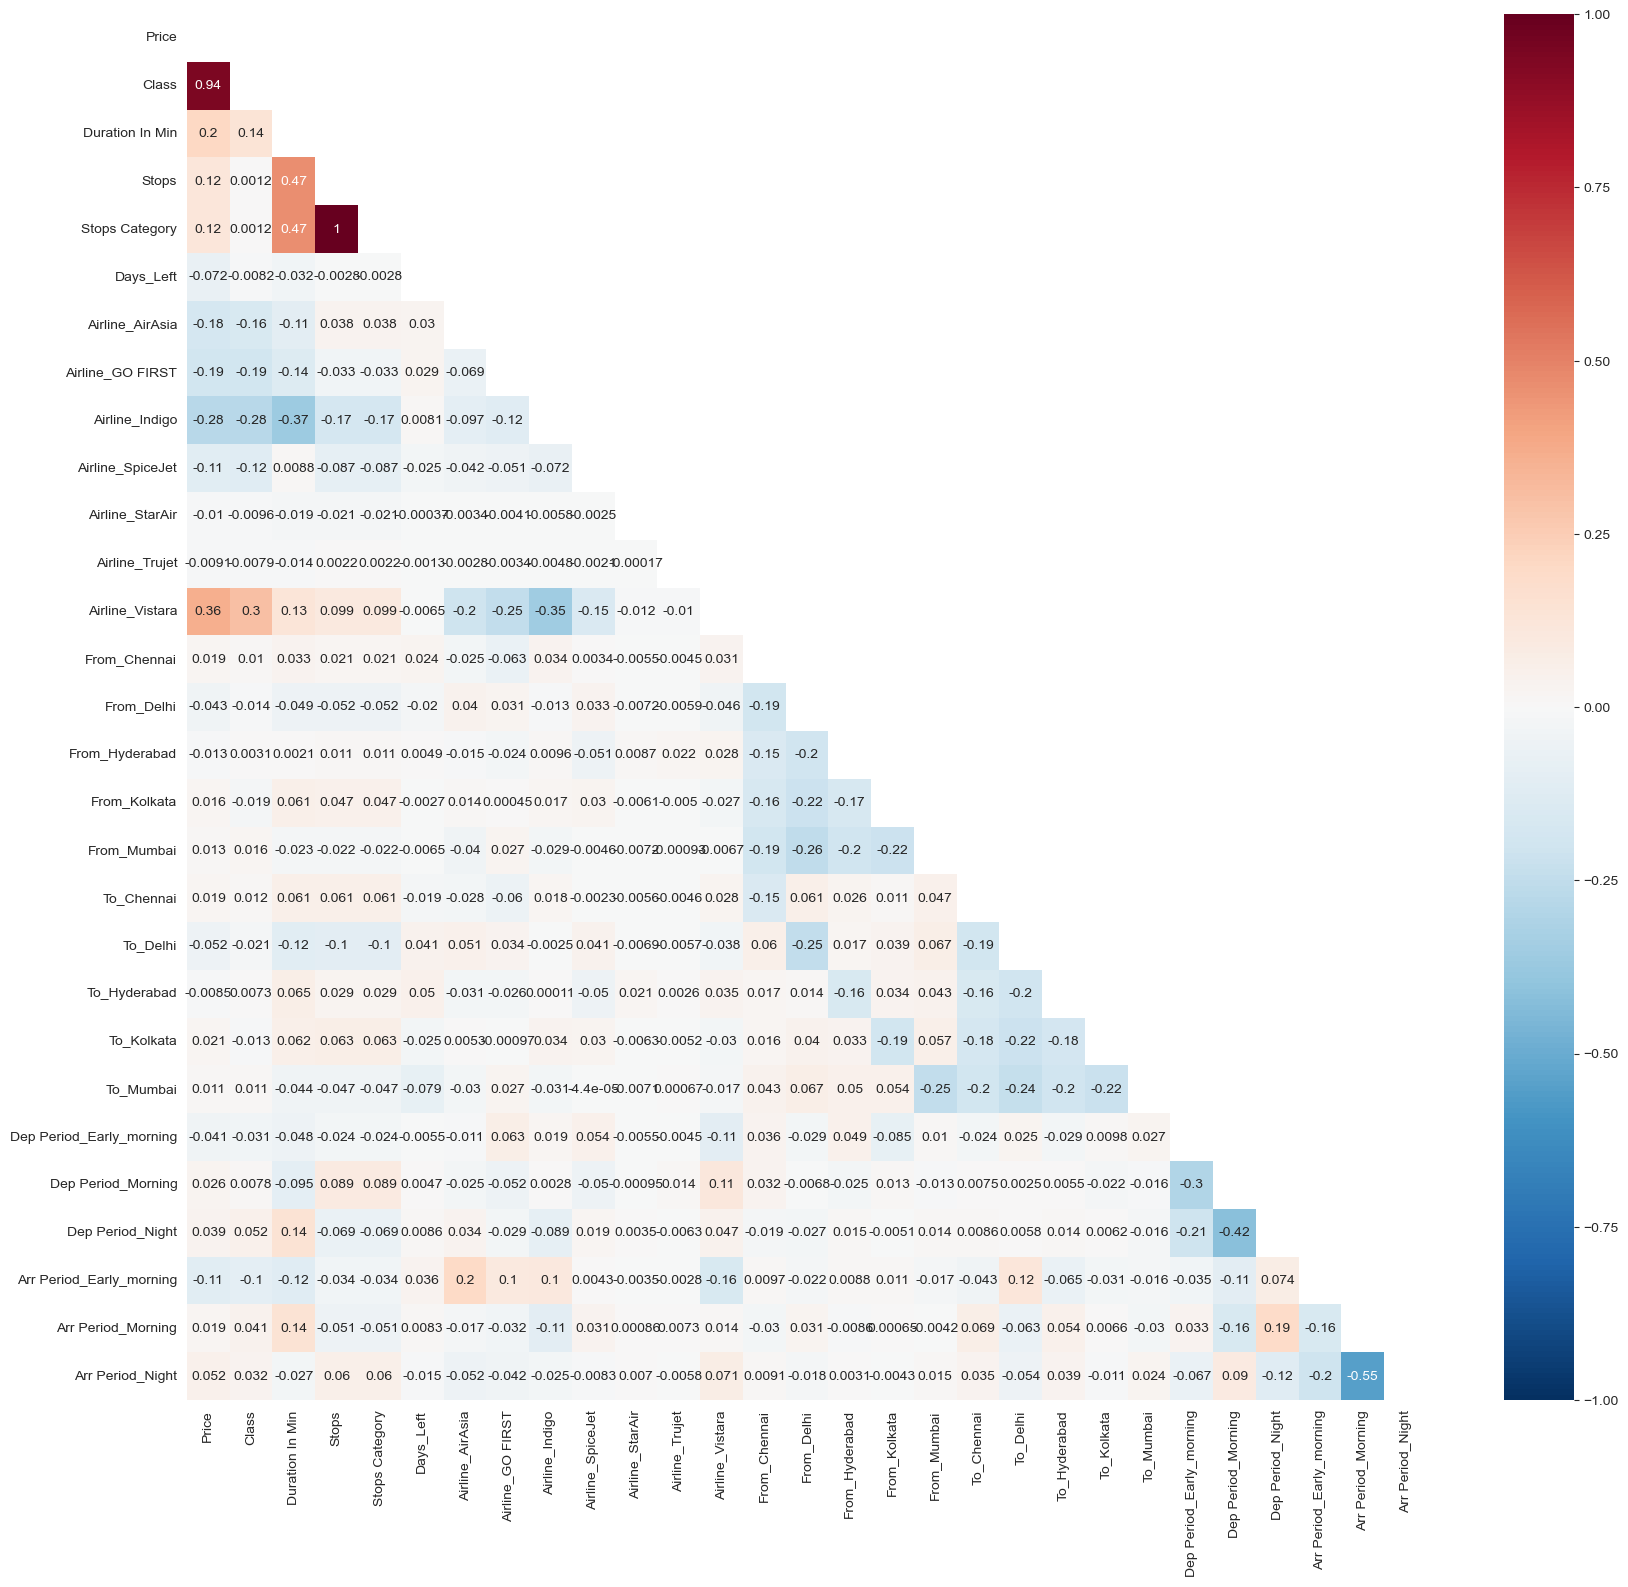

In [28]:
mask = np.triu(np.ones_like(df_preprocessed.corr(), dtype=bool))

plt.figure(figsize = (20,18))
sns.heatmap(df_preprocessed.corr(), data = df_preprocessed, mask=mask,annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')

However, the correlation is a good metric for linear relationship, but doesn't highlight non linear ones. For that I will use mutual information.

In [29]:
from sklearn.feature_selection import mutual_info_regression

In [30]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [31]:
X = df_preprocessed.copy()
y = X.pop("Price")

mi_scores = make_mi_scores(X, y)

In [32]:
print(mi_scores.sort_values(ascending=False))

Duration In Min             2.417321
Days_Left                   0.729024
Class                       0.617983
Airline_Vistara             0.516800
From_Delhi                  0.430998
From_Mumbai                 0.429807
Stops                       0.393273
Stops Category              0.393273
To_Delhi                    0.388911
To_Mumbai                   0.381863
From_Kolkata                0.361229
From_Hyderabad              0.347080
To_Kolkata                  0.338698
From_Chennai                0.325857
To_Hyderabad                0.321103
To_Chennai                  0.302890
Airline_Indigo              0.287735
Airline_GO FIRST            0.202153
Airline_AirAsia             0.165816
Dep Period_Morning          0.119296
Arr Period_Morning          0.107062
Arr Period_Night            0.106914
Dep Period_Early_morning    0.097871
Airline_SpiceJet            0.085641
Dep Period_Night            0.084030
Arr Period_Early_morning    0.079576
Airline_StarAir             0.001562
A

It can be noticed that Duration, Number of days left and the class are effectively influencing the fare of the air ticket.